In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Define linear regression model

In [3]:
class LinearRegression(tf.keras.Model):
    def __init__(self, num_inputs, num_outputs):
        super(LinearRegression, self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs, num_outputs))
        )
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]

    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b

Create a dataset

In [22]:
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

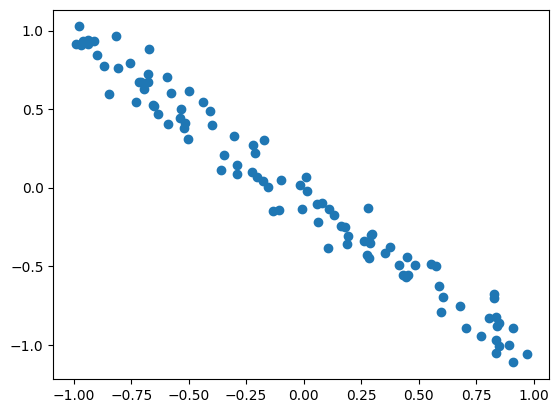

In [23]:
plt.scatter(X, Y);

Cast type, otherwise Tensorflow will complain

In [ ]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

Define the loss

In [24]:
def get_loss(model, inputs, targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))

In [29]:
def get_grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        # calculate the loss
        loss_value = get_loss(model, inputs, targets)
    
    #return gradient
    return tape.gradient(loss_value, model.params)

Create and train the model

In [25]:
model = LinearRegression(D, K)

# print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.01961976]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [37]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
    # Get gradients
    grads = get_grad(model, X, Y)
    
    # Do one step of gradient descent: param <- param - learning_rate * grad
    optimizer.apply_gradients(zip(grads, model.params))

    # Store the loss
    loss = get_loss(model, X, Y)
    losses.append(loss)


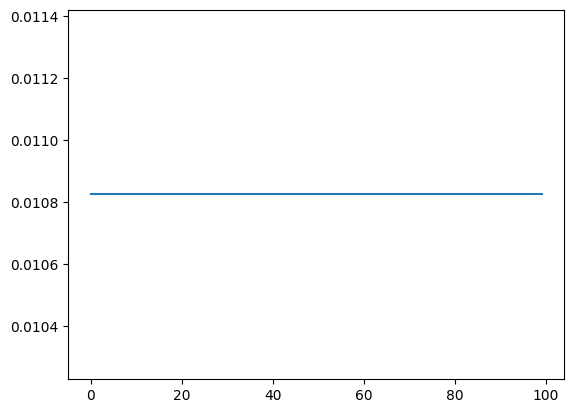

In [38]:
plt.plot(losses);

In [39]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

4/4 [==============================] - 0s 1ms/step


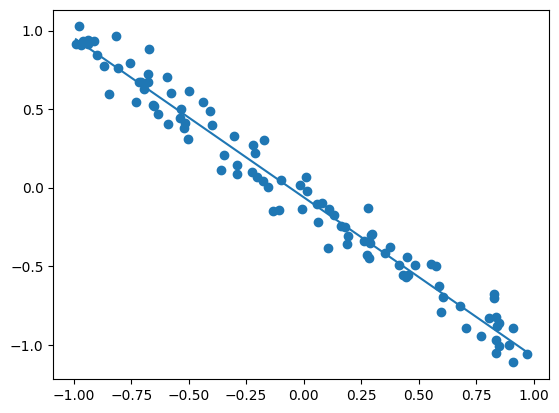

In [40]:
plt.scatter(X, Y)
plt.plot(x_axis, y_axis);

In [41]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.0151614]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.06083458], dtype=float32)>


In [36]:
print("True params:")
w, b

True params:


(array([[-1.02762273]]), -0.05506255599534554)